# Question 1
* Learn and understand Zipf’s Law.
* Pick any file (or files) in NLTK package.
* Prove if Zipf’s Law works in Natural Language or not. 
* REQUIREMNTS: (Must Do)
1. Use ’glob’ to open and read file. If read multiple files use LOOP to achieve.
2. Create at least one function and one lambda function.
3. Save your data as an CSV file contains (Word, Rank, Frequency) with TITLE and Sort it by RANK. 
4. Open your CSV file, generate a log-log figure according to the data you saved.
5. Write a conclusion at the end of your code base on your figure.

In [6]:
#import csv,glob, re, string and get the list of punctuation
import glob
import re
import string
import csv
punc=string.punctuation

In [7]:
#define a function and pass the file name 
def functionZif(str):
    path = 'inaugural/'+ str +'.txt'
    #define a list named words to get the list of the words from .txt
    #step1: get all clean words in a .txt
    words = []
    #define a list append the words withouth te punc.
    clean_all_words = []
    #open the file using glob and get the lines using .readlines()
    for file in glob.glob(path):
        infile = open(file, 'r')  
        lines = infile.readlines()
        for line in lines:  
            #get the clean word list using .lower() and remove the punc
            lower_line= line.lower()
            if lower_line not in punc:
                words = words + (lower_line.split())
    #remove all the punc
    clean_all_words = (' '.join(word.strip(punc) for word in words)).split()  
    
    #Step2: get the sorted word-frequency 
    wordFreq ={}
    for word in clean_all_words:
        if word not in wordFreq:
            wordFreq[word] =1  #give the value 1 if it is the new key
        else:
            wordFreq[word] +=1 #if it is not the new key then accumulate the value
    #sort the word-freq using lambda.
    wordFreq = sorted(wordFreq.items(), key=lambda x: x[1], reverse=True)
    
    #step3: get the three cololum of lists contains rank, word, frequency.
    wordList=[]
    freqList=[]
    rankList=[]
    
    for k, v in wordFreq:
        wordList.append(k)
        freqList.append(v)    
    #define the rank list
    def f(n):
        return list(range(1, n+1))
    
    rankList=f(len(wordFreq))
#     rankList.insert(0,'rank')
#     wordList.insert(0,'word')
#     freqList.insert(0,'freq')
    
    #open a filw for writing.
    csv_out = open ('zif/'+ 'zif-' + str+'.csv','w')
    #create the csv writer object.
    mywriter = csv.writer(csv_out)
    #add the column title for each list
    mywriter.writerow(['rank', 'word', 'freq'])
     #writerow - one row of data at a time
    for row in zip(rankList,wordList,freqList):      
        mywriter.writerow(row)
    #close the file
    csv_out.close()

functionZif('1789-Washington')
functionZif('1797-Adams')


In [156]:
#example: get the clean words
# path = '/Users/wentingsu/nltk_data/corpora/inaugural/1789-Washington.txt'
# #define a list named words to get the list of the words from .txt
# words = []
# clean_words = []
# for file in glob.glob(path):
#     infile = open(file, 'r')  
#     lines = infile.readlines()
#     for line in lines:       
#         lower_line= line.lower()
#         if lower_line not in punc:
#             words = words + (lower_line.split())
# clean_words = (' '.join(word.strip(punc) for word in words)).split()
# len(clean_words)

1430

In [ ]:
#example: to get sort word -freq
# wordFreq ={}
# for word in clean_words:
#     if word not in wordFreq:
#         wordFreq[word] =1  #give the value 1 if it is the new key
#     else:
#         wordFreq[word] +=1 #if it is not the new key then accumulate the value
# wordFreq = sorted(wordFreq.items(), key=lambda x: x[1], reverse=True)

# for k, v in wordFreq[:20]:
#     print(k, v)

# Question 1 continue 
1. (Optional) Use ‘matplotlib’ to generate a log-log figure in your code.  Before Submission Please Check:
2. Do I have Markdown TITLE at very beginning?
3. Do I use the required method to open and read files?
4. Do I use 'def' and ‘lambda’ in my code?
5. Do I write your code in small blocks instead of in one big block?  Do I have proper outputs or comments to show your progress?
6. Do I add TITLE in your CSV file? Is the data well sorted?
7. Do I create the figure with right form(log-log) in your csv file?
8. Do I give the conclusion at the end of your code?
9. ALL DONE? Submit your .ipynb file and your CSV file. DO NOT ZIP!

In [3]:
#import matplotlib. and pandas
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#use a simple statement to load the surveys data.
df = pd.read_csv('zif/zif-1789-Washington.csv', index_col='rank')
#there's a column in surveys.csv named "plot" which would make an excellent value to plot.
plot_data = df['freq']

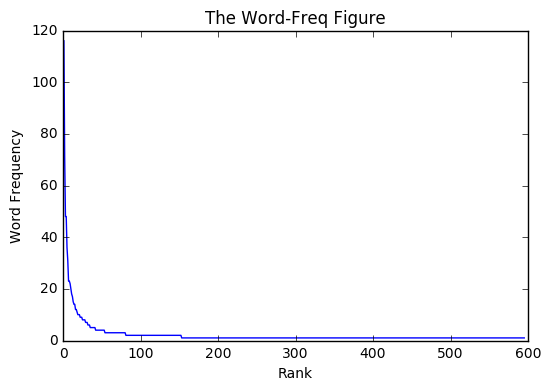

In [7]:
#an array of plot data indexed by the rank value. Let's plot it and give it a label.
plt.plot(plot_data, label='rank-freq')
#give the x-axis name
plt.xlabel('Rank')
#give the y-axis name
plt.ylabel('Word Frequency')
#set a title
plt.title('The Word-Freq Figure')
plt.show()
# plt.savefig('zif/word-freq.png')

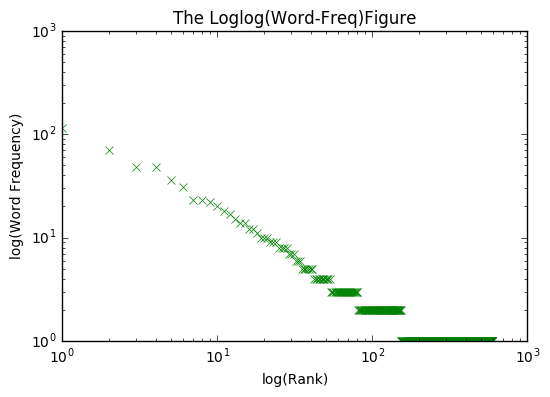

In [8]:
plt.loglog(plot_data,'gx', label='loglog fugure')

plt.xlabel('log(Rank)')
plt.ylabel('log(Word Frequency)')
plt.title('The Loglog(Word-Freq)Figure')
plt.show()
# plt.savefig('zif/loglog-word-freq.png')

### Conclusion: Zipf’s Law works in Natural Language. 